# Dataset: Employee Churn

**Challenge 2**: Next up, Pear Inc needs a crystal ball to foresee who will staty with them. Develop a model that predicts employee churn, complete with churn probabilities to help Gabriele take timely action. Remember, Gabriele's no fan of black-box machines, and Fabio's looking for proof that your model's magic works.

## Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import my_functions

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Load dataset

In [2]:
data_raw = pd.read_csv("../datasets/employee-churn/churn.csv")
data = my_functions.data_preprocessing(data_raw)

# Final touches to the dataset
data.drop(columns='target_label', inplace=True)
data.drop(columns='enrollee_id', inplace=True)

data = data.dropna()
data = pd.get_dummies(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17567 entries, 0 to 19157
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   city                                  17567 non-null  float64
 1   city_development_index                17567 non-null  float64
 2   relevent_experience                   17567 non-null  bool   
 3   education_level                       17567 non-null  float64
 4   experience                            17567 non-null  float64
 5   company_size                          17567 non-null  float64
 6   last_new_job                          17567 non-null  float64
 7   training_hours                        17567 non-null  int64  
 8   target                                17567 non-null  float64
 9   gender_Female                         17567 non-null  bool   
 10  gender_Male                           17567 non-null  bool   
 11  gender_Not given    

## Split data into training and test datasset

In [3]:
y_data = data['target']
x_data = data.drop(columns='target')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [5]:
print(f"Percentage of people quitting Pear Inc [train dataset]: {round(100*sum(y_train)/len(y_train),2)}%")
print(f"Percentage of people quitting Pear Inc [test dataset]: {round(100*sum(y_test)/len(y_test),2)}%")

Percentage of people quitting Pear Inc [train dataset]: 23.9%
Percentage of people quitting Pear Inc [test dataset]: 24.56%


## First model: decision tree

... spiegare ...

In [39]:
clf_tree = tree.DecisionTreeClassifier(max_depth=6).fit(x_train, y_train)

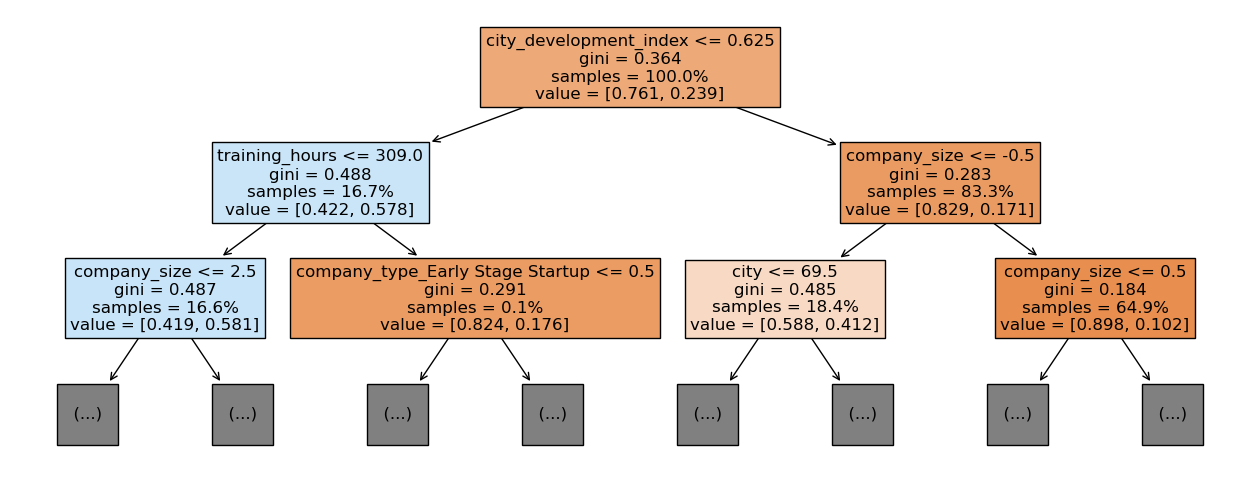

In [40]:
fig, axs = plt.subplots(1,1, figsize=(16,6))
tree.plot_tree(clf_tree, max_depth=2, feature_names=x_train.columns, proportion=True, fontsize=12, filled=True)
plt.show()

### Model testing

In [41]:
clf_tree.score(x_test, y_test)

0.8016505406943654

## Second model: Random Forest

... spiegare ...

In [57]:
clf_forest = RandomForestClassifier(n_estimators=8, max_depth=6).fit(x_train, y_train)

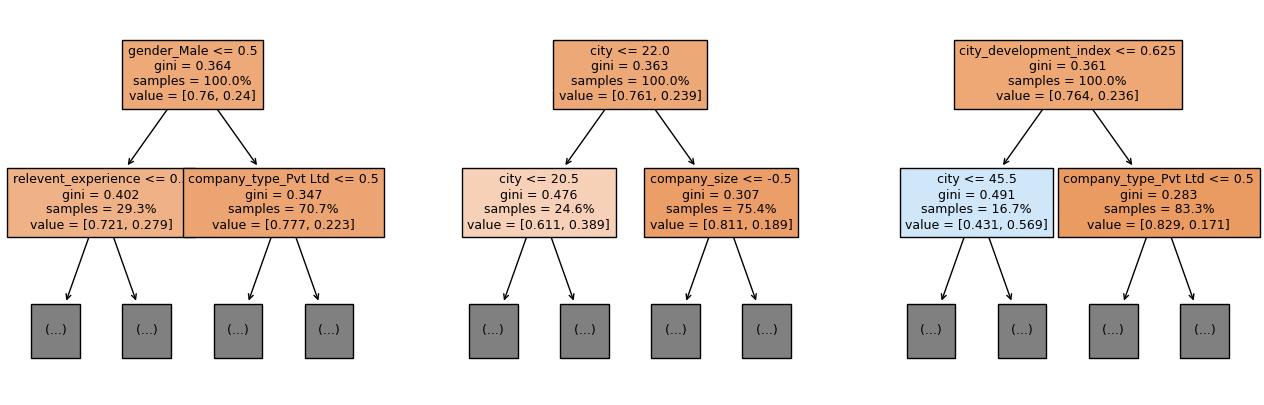

In [65]:
fig, axs = plt.subplots(1,3, figsize=(16,5))
for index in range(0, 3):
    tree.plot_tree(
        clf_forest.estimators_[index],
        max_depth=1,
        feature_names = x_data.columns, 
        fontsize=9,
        proportion=True, 
        filled = True,
        ax = axs[index])
plt.show()

### Model testing

In [59]:
clf_forest.score(x_test, y_test)

0.7916903813318156

## Third model: K-nearest neighbors

... spiegare ...

In [80]:
clf_knn = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)

### Model testing

In [81]:
clf_knn.score(x_test, y_test)

0.7700626067159931